In [23]:
import pandas as pd
import os 
import tiktoken
import json
from src import utils 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Read Data and create the function for utils

In [2]:
root = "/datadrive/CuongHV/project/DATA/AMI_MS"
files = os.listdir(root)
len(files)

125

In [3]:
path = "/datadrive/CuongHV/project/DATA/AMI_MS/ES2010b.json"
with open(path, encoding="utf8") as f:
    jsondict = json.load(f)
jsondict


{'transcript': "Okay. Um welcome to our second meeting. This is the functional design meeting. And I hope you all had a good individual working time. Okay, let's get started. Okay, here's the agenda for the meeting. After the opening um I am going to fulfil the role of secretary, take the meeting minutes. And we're gonna have three presentations, one from each of you. Then we're gonna discuss some new project requirements. Um gonna come to a decision on the functions of the remote control. And then we're gonna close up the meeting. And we're gonna do this all in about forty minutes. Okay. First I want to discuss the goals of this meeting. First we need to determine the user requirements and the question that we can ask ourselves is what needs and desires are to be fulfilled by this remote control. And then we're going to determine the technical functions, what is the effect of the apparatus, what actually is it supposed to do, what do people pick up the remote and use it for. And then 

In [16]:
jsondict.keys()

dict_keys(['transcript', 'summary', 'actions', 'decisions', 'problems', 'pens', 'whiteboard', 'shared-doc'])

In [17]:
jsondict['shared-doc'].keys()

dict_keys(['txt', 'ppt', 'doc'])

In [4]:
def get_text_from_txt(jsondict):
    outputs = []
    for x in jsondict['shared-doc']['txt']:
        filename = x['filename']
        content = x['content']
        o = f'{filename} \n ------------ \n {content}'
        outputs.append(o)
    outputs = '\n'.join(outputs)
    return outputs
o = get_text_from_txt(jsondict)
print(o)

ES2010docs.ES2010scen.Summaries.P1Sum1.txt 
 ------------ 
 Received: from [139.222.1.2] by messenger
  (ArGoSoft Mail Server Freeware, Version 1.8 (1.8.6.4)); Wed, 16 Feb 2005 11:38:33 +0000
Message-ID: <001701c5141c$46c6ca40$0201de8b@participant1>
From: "participant1" <participant1@ami>
To: <HeadOfDept@ami>
References: <01c5141a$Blat.v2.2.2$27b9dec8@messenger>
Subject: Re: Please summarise the last meeting
Date: Wed, 16 Feb 2005 11:40:11 -0000
MIME-Version: 1.0
Content-Type: multipart/alternative;
	boundary="----=_NextPart_000_0014_01C5141C.45E013C0"
X-Priority: 3
X-MSMail-Priority: Normal
X-Mailer: Microsoft Outlook Express 6.00.2900.2180
X-MimeOLE: Produced By Microsoft MimeOLE V6.00.2900.2180

This is a multi-part message in MIME format.

------=_NextPart_000_0014_01C5141C.45E013C0
Content-Type: text/plain;
	charset="iso-8859-1"
Content-Transfer-Encoding: quoted-printable

For the documentation of the design project, you and all of your =
colleages are asked to fill out a short qu

In [15]:
import re

def clean_text(raw_text):
     # Replace multiple consecutive newlines (\n\n, \n\n\n, etc.) with a single \n
    cleaned_text = re.sub(r'\n{2,}', '\n', raw_text)
    # Remove extra spaces at the beginning of each line
    cleaned_text = re.sub(r'^ +', '', cleaned_text, flags=re.MULTILINE)
    return cleaned_text.strip()  # Remove leading/trailing spaces

# Example usage:
cleaned_content = clean_text(o)
print(cleaned_content)

ES2010docs.ES2010scen.participant2hBcComponents_design.ppt 
------------ 
Components Design
Presented by: Amber MacAdam, Industrial Designer
Basic Remote Operation:
Pressed button makes connection
Chip sense connection
Chip produces Morse-code infrared signal specific to that button
Transistors amplify the signal
Sensor on TV interprets the signal and responds accordingly
Findings-Required Materials for basic internal construction:
Rubber for buttons
Aluminium for battery contacts
Integrated circuit –diode, transistor, resonator, resistors, capacitor
Fiber glass and thin copper wire to create circuit board
LED
Contact disks for the buttons
Plastic for casing
Power source
Personal Preferences
To save money the components of the remote should be mass produced and the basic materials should be bought on mass
If we find another company who can produce the required chips, casing, LED and additional materials at a less expensive rate then we, ourselves, can we should go for it.
Suggested Po

In [11]:
def get_text_from_doc(jsondict):
    outputs = []
    for x in jsondict['shared-doc']['doc']:
        filename = x['filename']
        content = x['content']
        o = f'{filename} \n ------------ \n {content}'
        outputs.append(o)
    outputs = '\n'.join(outputs)
    return outputs
o = get_text_from_doc(jsondict)
print(o)

ES2010docs.ES2010scen.participant1hBcQuestionnairePost.doc 
 ------------ 
 Questionnaire after the meetings cycle 



Name: Amanda Olson

          

        Background information 

(Please place an ‘*’ next to your answers)

         

       1. Do you feel that the objectives for today’s meetings were generally attained? 

Never

Hardly ever 

Sometimes

Most of the times 

*Always

         

       2. Do you feel that the time for today’s meetings was generally well-spent? 

Never

Hardly ever 

Sometimes

*Most of the times 

Always

         

       3. Did you generally enjoy participating in today’s meetings? 

Never

Hardly ever 

Sometimes

*Most of the times 

Always

         

       4. Which of the following did you make use of before the meetings to prepare for the meetings (beside the instructions from your personal coach)? 

Minutes of the previous meeting(s)

Related documentation and information (e-mail, internet, project folder)

Agenda

*Personal recollection

Pe

In [12]:
def get_text_from_ppt(jsondict):
    outputs = []
    for x in jsondict['shared-doc']['ppt']:
        filename = x['filename']
        string = ['\n'.join(v) for k,v in x['content'].items()]
        content = '\n'.join(string)
        o = f'{filename} \n ------------ \n {content}'
        outputs.append(o)
    outputs = '\n'.join(outputs)
    return outputs 
o= get_text_from_ppt(jsondict)
print(o)

ES2010docs.ES2010scen.participant2hBcComponents_design.ppt 
 ------------ 
 Components Design
Presented by: Amber MacAdam, Industrial Designer
Basic Remote Operation:
Pressed button makes connection
Chip sense connection
Chip produces Morse-code infrared signal specific to that button
Transistors amplify the signal
Sensor on TV interprets the signal and responds accordingly
Findings-Required Materials for basic internal construction:
Rubber for buttons
Aluminium for battery contacts
Integrated circuit –diode, transistor, resonator, resistors, capacitor
Fiber glass and thin copper wire to create circuit board
LED
Contact disks for the buttons
Plastic for casing
Power source

Personal Preferences
To save money the components of the remote should be mass produced and the basic materials should be bought on mass
If we find another company who can produce the required chips, casing, LED and additional materials at a less expensive rate then we, ourselves, can we should go for it.
Suggested

In [13]:
# Extract text from txt, ppt, and doc
txt_content = get_text_from_txt(jsondict)
ppt_content = get_text_from_ppt(jsondict)
doc_content = get_text_from_doc(jsondict)
merged_content = txt_content + '\n' + ppt_content + '\n' + doc_content

print(merged_content)

ES2010docs.ES2010scen.Summaries.P1Sum1.txt 
 ------------ 
 Received: from [139.222.1.2] by messenger
  (ArGoSoft Mail Server Freeware, Version 1.8 (1.8.6.4)); Wed, 16 Feb 2005 11:38:33 +0000
Message-ID: <001701c5141c$46c6ca40$0201de8b@participant1>
From: "participant1" <participant1@ami>
To: <HeadOfDept@ami>
References: <01c5141a$Blat.v2.2.2$27b9dec8@messenger>
Subject: Re: Please summarise the last meeting
Date: Wed, 16 Feb 2005 11:40:11 -0000
MIME-Version: 1.0
Content-Type: multipart/alternative;
	boundary="----=_NextPart_000_0014_01C5141C.45E013C0"
X-Priority: 3
X-MSMail-Priority: Normal
X-Mailer: Microsoft Outlook Express 6.00.2900.2180
X-MimeOLE: Produced By Microsoft MimeOLE V6.00.2900.2180

This is a multi-part message in MIME format.

------=_NextPart_000_0014_01C5141C.45E013C0
Content-Type: text/plain;
	charset="iso-8859-1"
Content-Transfer-Encoding: quoted-printable

For the documentation of the design project, you and all of your =
colleages are asked to fill out a short qu

In [16]:
merged_content_cleaned = clean_text(merged_content)
print(merged_content_cleaned)

ES2010docs.ES2010scen.Summaries.P1Sum1.txt 
------------ 
Received: from [139.222.1.2] by messenger
(ArGoSoft Mail Server Freeware, Version 1.8 (1.8.6.4)); Wed, 16 Feb 2005 11:38:33 +0000
Message-ID: <001701c5141c$46c6ca40$0201de8b@participant1>
From: "participant1" <participant1@ami>
To: <HeadOfDept@ami>
References: <01c5141a$Blat.v2.2.2$27b9dec8@messenger>
Subject: Re: Please summarise the last meeting
Date: Wed, 16 Feb 2005 11:40:11 -0000
MIME-Version: 1.0
Content-Type: multipart/alternative;
	boundary="----=_NextPart_000_0014_01C5141C.45E013C0"
X-Priority: 3
X-MSMail-Priority: Normal
X-Mailer: Microsoft Outlook Express 6.00.2900.2180
X-MimeOLE: Produced By Microsoft MimeOLE V6.00.2900.2180
This is a multi-part message in MIME format.
------=_NextPart_000_0014_01C5141C.45E013C0
Content-Type: text/plain;
	charset="iso-8859-1"
Content-Transfer-Encoding: quoted-printable
For the documentation of the design project, you and all of your =
colleages are asked to fill out a short questionn

In [17]:
def num_tokens_from_string(string: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding_name = "cl100k_base"
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [18]:
num_tokens_from_string(merged_content_cleaned)


146918

# ETL data

In [3]:
root = "/datadrive/CuongHV/project/DATA/AMI_MS"
files = os.listdir(root)

In [20]:
print(f'{root}/{files[0]}')

/datadrive/CuongHV/project/DATA/AMI_MS/ES2004d.json


In [ ]:
data = []
for file in files:
    print(f"process {file}")
    # load json file
    path = f'{root}/{file}'
    with open(path, encoding="utf8") as f:
        jsondict = json.load(f)
    # Transcripts
    transcripts_cleaned = utils.clean_text(jsondict['transcript'])
    num_tokens_transcripts = utils.num_tokens_from_string(transcripts_cleaned)

    # Summary
    summary_cleaned = utils.clean_text(jsondict['summary'])
    num_tokens_summary = utils.num_tokens_from_string(summary_cleaned)

    # Shared doc
        # Extract text from txt, ppt, and doc
    try:
        txt_content = utils.get_text_from_txt(jsondict)
    except:
        txt_content = ''
    try:
        ppt_content = utils.get_text_from_ppt(jsondict)
    except:
        ppt_content = ''
    try:
        doc_content = utils.get_text_from_doc(jsondict)
    except:
        doc_content = ''
    merged_content = txt_content + '\n' + ppt_content + '\n' + doc_content
        # Clean text
    merged_content_cleaned = utils.clean_text(merged_content)
        # Count tokens
    num_tokens_shared_doc = utils.num_tokens_from_string(merged_content_cleaned)

    # Save to dataframe
    data.append({
        'file': file,
        'num_tokens_transcripts': num_tokens_transcripts,
        'num_tokens_summary': num_tokens_summary,
        'num_tokens_shared_doc': num_tokens_shared_doc
    })

    # Save as cleaned json
    cleaned_jsondict = {
        "transcript": transcripts_cleaned,
        "summary": summary_cleaned,
        "actions": jsondict['actions'],
        "decisions": jsondict['decisions'],
        "problems": jsondict['problems'],
        "shared-doc": merged_content_cleaned
    }
    with open(f"/datadrive/CuongHV/project/DATA/AMI_MS_Cleaned/{file}", "w", encoding="utf8") as f:
        json.dump(cleaned_jsondict, f, ensure_ascii=False, indent=4)
    print(f'{file} done')
# Convert to DF and save as CSV 
columns = ["file", "num_tokens_transcripts", "num_tokens_summary", "num_tokens_shared_doc"]
df = pd.DataFrame(data)
df.to_csv("token_data.csv", mode="w", header=True, index=False,columns=columns)

process ES2004d.json
ES2004d.json done
process ES2008b.json
ES2008b.json done
process IS1000b.json
IS1000b.json done
process IS1004d.json
IS1004d.json done
process IS1008a.json
IS1008a.json done
process ES2015b.json
ES2015b.json done
process IS1004a.json
IS1004a.json done
process TS3011b.json
TS3011b.json done
process ES2015d.json
ES2015d.json done
process IS1005b.json
IS1005b.json done
process ES2008c.json
ES2008c.json done
process TS3003a.json
TS3003a.json done
process ES2013d.json
ES2013d.json done
process ES2008d.json
ES2008d.json done
process ES2013c.json
ES2013c.json done
process ES2015c.json
ES2015c.json done
process IS1006d.json
IS1006d.json done
process IS1006c.json
IS1006c.json done
process IS1005a.json
IS1005a.json done
process ES2006d.json
ES2006d.json done
process ES2004b.json
ES2004b.json done
process TS3008a.json
TS3008a.json done
process ES2009d.json
ES2009d.json done
process IS1005c.json
IS1005c.json done
process TS3003b.json
TS3003b.json done
process TS3010b.json
TS30

# EDA

In [28]:
path = "/datadrive/CuongHV/project/mm_agenda_generation_research/EDA/token_data.csv"
df = pd.read_csv(path)
df.head()

,file,num_tokens_transcripts,num_tokens_summary,num_tokens_shared_doc
0,ES2004d.json,11420,176,131699
1,ES2008b.json,10489,153,133296
2,IS1000b.json,11094,228,0
3,IS1004d.json,8416,203,14540
4,IS1008a.json,5233,161,7285


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   file                    125 non-null    object
 1   num_tokens_transcripts  125 non-null    int64 
 2   num_tokens_summary      125 non-null    int64 
 3   num_tokens_shared_doc   125 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 4.0+ KB


In [29]:
# Calculate statistics
def get_stats(df):
    stats = df[['num_tokens_transcripts', 'num_tokens_summary', 'num_tokens_shared_doc']].describe().T
    stats['median'] = df[['num_tokens_transcripts', 'num_tokens_summary', 'num_tokens_shared_doc']].median()

    # Rename columns for clarity
    stats = stats.rename(columns={
        'min': 'Min',
        'max': 'Max',
        'mean': 'Mean',
        '50%': 'Median',
        'std': 'Std Dev'
    })

    # Select relevant columns
    stats = stats[['Min', 'Max', 'Mean', 'median', 'Std Dev']]
    return stats
print(get_stats(df))

                           Min       Max       Mean  median       Std Dev
num_tokens_transcripts  1324.0   16035.0   8277.664  8424.0   3288.116148
num_tokens_summary        43.0     608.0    182.392   185.0     58.693421
num_tokens_shared_doc      0.0  146918.0  27825.280  3775.0  50441.990765


In [30]:
get_stats(df)

,Min,Max,Mean,median,Std Dev
num_tokens_transcripts,1324.0,16035.0,8277.664,8424.0,3288.116148
num_tokens_summary,43.0,608.0,182.392,185.0,58.693421
num_tokens_shared_doc,0.0,146918.0,27825.280,3775.0,50441.990765


Dữ liệu gồm ba loại token: Transcripts, Summary, và Shared Doc, với các chỉ số thống kê như sau:

1. Số lượng token trong Transcripts (num_tokens_transcripts)
Phạm vi: Dao động từ 1,324 đến 16,035 token.
Trung bình: Khoảng 8,278 token, nhưng giá trị trung vị (8,424) gần với trung bình, cho thấy phân phối khá cân bằng.
Độ lệch chuẩn: 3,288, cho thấy có sự phân tán nhất định nhưng không quá lớn.
🔹 Nhận xét: Hầu hết các đoạn hội thoại có độ dài tương đối đồng đều, nhưng vẫn có một số hội thoại rất dài (trên 16,000 token) và một số rất ngắn (1,324 token).
2. Số lượng token trong Summary (num_tokens_summary)
Phạm vi: Từ 43 đến 608 token.
Trung bình: 182 token, trong khi trung vị là 185, rất gần với trung bình.
Độ lệch chuẩn: 58.7, cho thấy mức độ phân tán thấp.
🔹 Nhận xét: Các bản tóm tắt có kích thước khá đồng nhất, với phần lớn nằm trong khoảng 100-200 token.
3. Số lượng token trong Shared Doc (num_tokens_shared_doc)
Phạm vi: Từ 0 đến 146,918 token, với trung bình 27,825 và trung vị 3,775.
Độ lệch chuẩn: 50,441, rất cao, cho thấy sự phân tán dữ liệu lớn.
🔹 Nhận xét:
Một số tài liệu có số lượng token cực lớn (hơn 100,000 token), trong khi một số không có tài liệu chia sẻ (0 token).
Trung bình cao nhưng trung vị thấp cho thấy phần lớn tài liệu có số token nhỏ, nhưng có một số giá trị rất lớn kéo trung bình lên cao.
Tóm tắt tổng quan
Transcripts có sự phân tán vừa phải, phản ánh độ dài hội thoại khác nhau.
Summary có phân bố khá đồng đều, không có sự chênh lệch lớn giữa các tệp.
Shared Doc có sự phân tán cực lớn, với một số tệp có rất nhiều token và một số không có dữ liệu.
Phân phối dữ liệu này cho thấy hội thoại có thể có độ dài đa dạng, tóm tắt được chuẩn hóa với kích thước nhất định, và tài liệu chia sẻ có sự chênh lệch rất lớn giữa các tệp.

In [18]:
# remove 0 values
df_non_0 = df[(df['num_tokens_transcripts'] > 0) & (df['num_tokens_summary'] > 0) & (df['num_tokens_shared_doc'] > 0)]
print(get_stats(df_non_0))


                           Min       Max          Mean   median       Std Dev
num_tokens_transcripts  1324.0   13591.0   7818.432836   7963.0   3161.115670
num_tokens_summary        43.0     608.0    177.059701    179.0     70.499061
num_tokens_shared_doc   2394.0  146918.0  51912.835821  12466.0  59253.504750


In [37]:
100000/14000

7.142857142857143

In [20]:
df_non_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 0 to 123
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   file                    67 non-null     object
 1   num_tokens_transcripts  67 non-null     int64 
 2   num_tokens_summary      67 non-null     int64 
 3   num_tokens_shared_doc   67 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


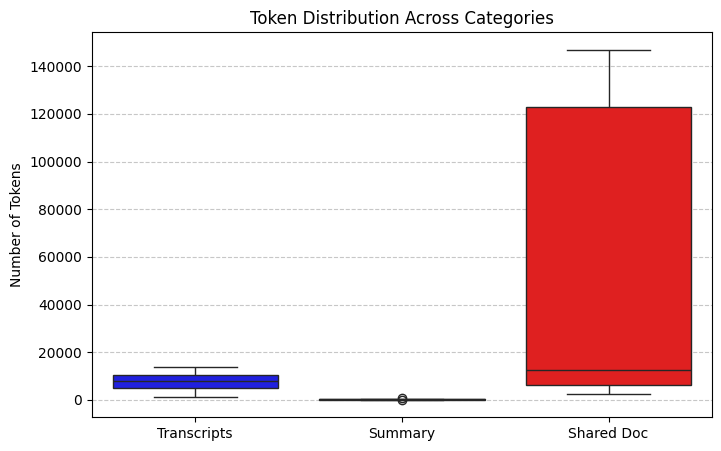

In [ ]:
import seaborn as sns
import pandas as pd

# Vẽ biểu đồ hộp (Boxplot) để hiển thị phân phối dữ liệu
plt.figure(figsize=(8, 5))
sns.boxplot(df_non_0, palette=["blue", "green", "red"])
# Gán nhãn
plt.xticks([0, 1, 2], ["Transcripts", "Summary", "Shared Doc"])
plt.ylabel("Number of Tokens")
plt.title("Token Distribution Across Categories")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Hiển thị biểu đồ
plt.show()



1. Số lượng token trong Transcripts (num_tokens_transcripts)
Phạm vi: Từ 1,324 đến 13,591 token.
Trung bình: 7,818 token.
Trung vị: 7,963 token, khá gần với trung bình, cho thấy phân phối khá cân đối.
Độ lệch chuẩn: 3,161, thể hiện mức độ biến động vừa phải.

🔹 Nhận xét:
Các hội thoại có độ dài khá đa dạng, nhưng không quá lệch về một phía.
Độ lệch chuẩn không quá cao, cho thấy độ dài hội thoại có sự nhất quán nhất định.

2. Số lượng token trong Summary (num_tokens_summary)
Phạm vi: Từ 43 đến 608 token.
Trung bình: 177 token.
Trung vị: 179 token, gần với trung bình.
Độ lệch chuẩn: 70.5, mức độ biến động tương đối thấp.

🔹 Nhận xét:
Các bản tóm tắt có độ dài tương đối ổn định, dao động chủ yếu quanh mức trung bình.
Một số bản tóm tắt dài hơn (trên 600 token), nhưng phần lớn nằm trong khoảng 100-200 token.

3. Số lượng token trong Shared Doc (num_tokens_shared_doc)
Phạm vi: Từ 2,394 đến 146,918 token, cho thấy sự chênh lệch rất lớn.
Trung bình: 51,912 token.
Trung vị: 12,466 token, thấp hơn nhiều so với trung bình, cho thấy có một số giá trị cực lớn kéo trung bình lên cao.
Độ lệch chuẩn: 59,253, cực kỳ cao, phản ánh sự biến động lớn.

🔹 Nhận xét:
Dữ liệu có sự phân tán mạnh, với một số tài liệu rất lớn (trên 100,000 token), trong khi phần lớn có số token nhỏ hơn nhiều.
Trung vị chỉ khoảng 12,466, nghĩa là hơn một nửa số tài liệu có số token khá thấp.
Sự chênh lệch này có thể do một số tệp chứa tài liệu rất dài, trong khi phần lớn các tệp khác ngắn hơn nhiều.

Tóm tắt tổng quan

Transcripts có sự phân bố tương đối cân đối, không quá lệch về phía hội thoại quá dài hay quá ngắn.
Summary khá đồng đều, với độ dài không dao động quá lớn giữa các tệp.
Shared Doc có sự phân tán cực cao, với một số tài liệu rất lớn kéo trung bình lên cao, trong khi phần lớn tài liệu có số token thấp hơn nhiều.
Phân phối này cho thấy sự khác biệt lớn về kích thước tài liệu chia sẻ, trong khi hội thoại và tóm tắt có xu hướng ổn định hơn. 